In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import keras

import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
img_size = 256
batch_size = 12
channel = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/train",
                                                             shuffle= True,
                                                             seed = 42,
                                                             image_size=(img_size,img_size),
                                                             batch_size= batch_size,
                                                              color_mode = "rgb")

Found 322 files belonging to 3 classes.


In [4]:
class_name = dataset.class_names
class_name

['Benign', 'Malignant', 'Normal']

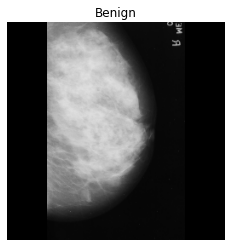

In [5]:
for img_batch, label_batch in dataset.take(1):
    plt.imshow(img_batch[1].numpy().astype("uint8"))
    plt.title(class_name[label_batch[1]])
    plt.axis("Off")

In [6]:
print("Number of batches in a Dataset:", len(dataset))

# Taking 80% of data for training purpose
train_ds = dataset.take(round(len(dataset)* 0.8))

# Skipping 80% of training data and Taking remaining 20% of data for Validation and Test
val_n_test = dataset.skip(round(len(dataset)*0.8))

# Taking 10% of data from val_n_test for validation and another 10% for test data
val_ds = val_n_test.take(round(len(val_n_test)*0.5))
test_ds = val_n_test.skip(round(len(val_n_test)*0.5))

print("Train Dataset:",len(train_ds))
print()
print("Number of batches selected for test and validation:", len(val_n_test))
print("Validation Dataset:",len(val_ds))
print("Test Dataset:", len(test_ds))

Number of batches in a Dataset: 27
Train Dataset: 22

Number of batches selected for test and validation: 5
Validation Dataset: 2
Test Dataset: 3


In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds  = val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_size,img_size, channel)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                    

In [10]:
history = model.fit(train_ds,
          batch_size = batch_size,
          validation_data = val_ds,
          verbose=1,
          epochs=20,)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


22/22 [==============================] - 7s 99ms/step - loss: 37.0340 - accuracy: 0.4394 - val_loss: 0.6772 - val_accuracy: 0.6667
Epoch 2/20
22/22 [==============================] - 1s 36ms/step - loss: 1.1531 - accuracy: 0.5644 - val_loss: 0.6976 - val_accuracy: 0.7083
Epoch 3/20
22/22 [==============================] - 1s 30ms/step - loss: 0.8393 - accuracy: 0.6553 - val_loss: 0.6794 - val_accuracy: 0.7083
Epoch 4/20
22/22 [==============================] - 1s 30ms/step - loss: 0.7776 - accuracy: 0.6932 - val_loss: 0.6237 - val_accuracy: 0.7500
Epoch 5/20
22/22 [==============================] - 1s 30ms/step - loss: 0.7271 - accuracy: 0.6818 - val_loss: 0.5177 - val_accuracy: 0.7083
Epoch 6/20
22/22 [==============================] - 0s 22ms/step - loss: 0.6269 - accuracy: 0.7652 - val_loss: 0.6078 - val_accuracy: 0.7500
Epoch 7/20
22/22 [==============================] - 0s 22ms/step - loss: 0.5796 - accuracy: 0.7538 - val_loss: 0.6199 - val_accuracy: 0.8333
Epoch 8/20
22/22 [=====

In [11]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 1s 61ms/step - loss: 1.3662 - accuracy: 0.7941


In [12]:
scores

[1.3661550283432007, 0.7941176295280457]

In [13]:
history.params

{'epochs': 20, 'steps': 22, 'verbose': 1}

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
loss = history.history["loss"]
acc = history.history["accuracy"]

val_loss = history.history["val_loss"]
val_acc = history.history["val_accuracy"]

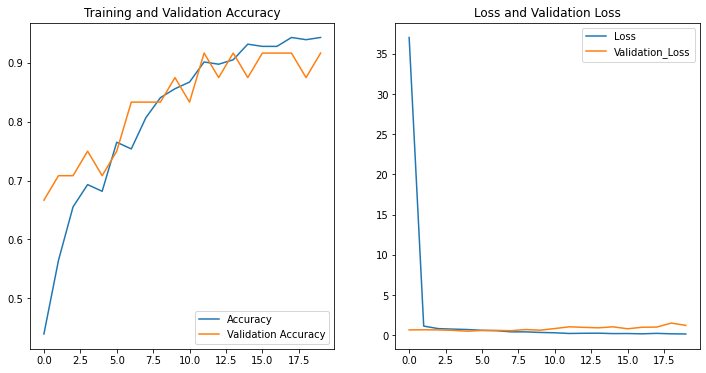

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(20), acc, label="Accuracy")
plt.plot(range(20), val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(20), loss, label="Loss")
plt.plot(range(20), val_loss,label="Validation_Loss")
plt.legend(loc="upper right")
plt.title("Loss and Validation Loss")
plt.show()

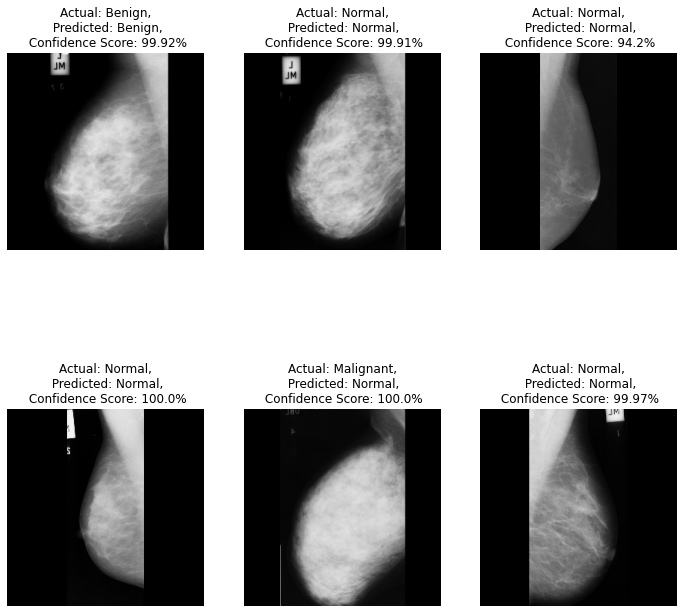

In [17]:
BATCH_SIZE = 6
plt.figure(figsize=(12, 12))
for images, labels in val_ds.take(1):
   for i in range(BATCH_SIZE):
      ax = plt.subplot(2, 3, i + 1)
      plt.imshow(images[i].numpy().astype('uint8'))
      actual_cls = class_name[labels[i]]
      prediction = model.predict(images)
      predicted_cls = class_name[np.argmax(prediction[i])]
      confidence = round(100 * (np.max(prediction[i])), 2)
      plt.title(f"Actual: {actual_cls},\n Predicted: {predicted_cls},\n Confidence Score: {confidence}%")
      plt.axis("off")

In [18]:
model.save("/content/M_BreastCancer_CNN.h5")

In [19]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print("\nTestAccuracy:", test_acc)

3/3 - 0s - loss: 1.3662 - accuracy: 0.7941 - 44ms/epoch - 15ms/step

TestAccuracy: 0.7941176295280457


In [20]:
new_model = keras.models.load_model("/content/M_BreastCancer_CNN.h5")

Normal
Accuracy Score: 1.0


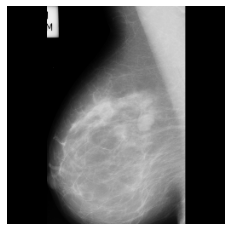

In [21]:
for img,label in test_ds.take(1):
  prediction = model.predict(img)
  print(class_name[np.argmax(prediction[0])])
  print(f"Accuracy Score: {round(np.max(prediction[0]),2)}")
  plt.imshow(img[0].numpy().astype("uint8"))
  plt.axis("off")
  break